## Задача 1

1.2 Изучите стоимости недвижимости

1.3 Изучите распределение квадратуры жилой

1.4 Изучите распределение года постройки

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv', encoding = 'latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


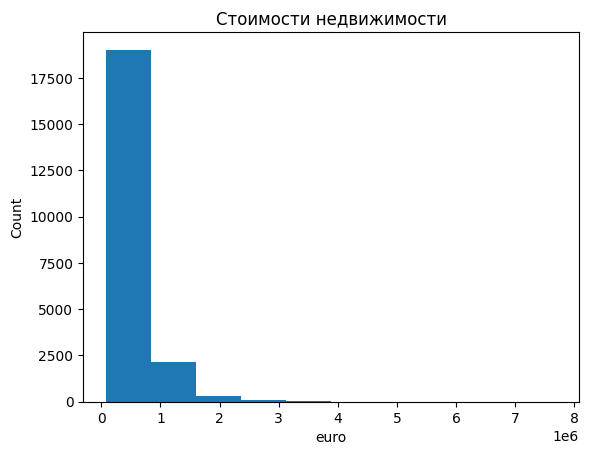

In [15]:
plt.hist(df['price'])
plt.xlabel('euro')
plt.ylabel('Count')
plt.title('Стоимости недвижимости');

1.2 Подавляющее количество домов находятся в одном ценовом диапазоне - до 800000 euro

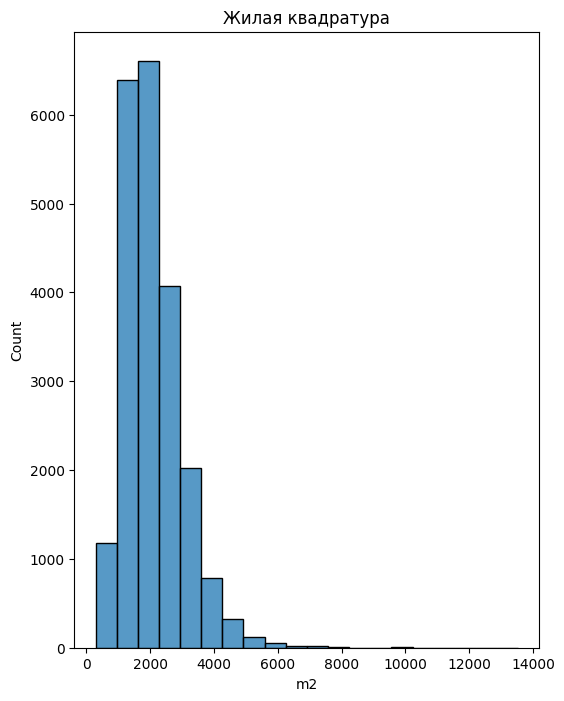

In [41]:
plt.figure(figsize=(6, 8))
sns.histplot(df['sqft_living'], bins=20)
plt.xlabel('m2')
plt.ylabel('Count')
plt.title('Жилая квадратура');

1.3 Большинство домов имеют площадь примерно от 1500 м2 до 3000 м2, далее с увеличением жилой площади количество домов падает

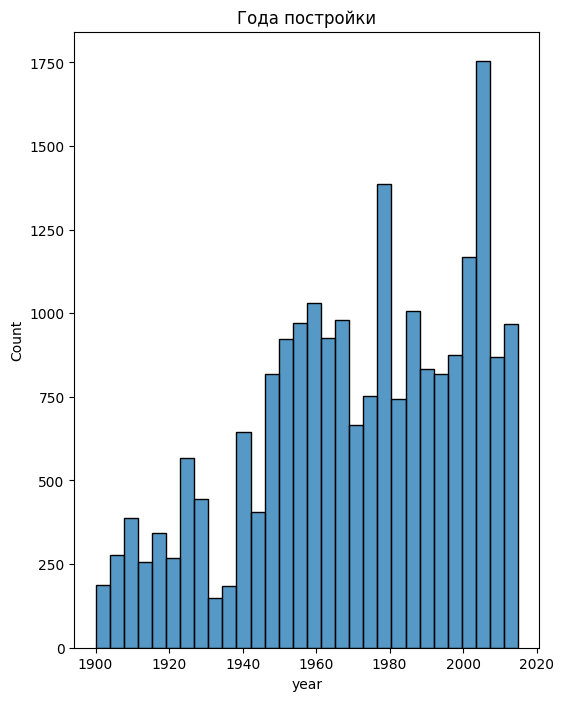

In [42]:
plt.figure(figsize=(6, 8))
sns.histplot(df['yr_built'], bins=30)
plt.xlabel('year')
plt.ylabel('Count')
plt.title('Года постройки');

1.4 Можно сказать,что с каждым годом количество построенных домов растет, наблюдаются резкое возрастание в 1980 году и с 2000 года по 2008 год

## Задача 2
2.1 Изучите распределение домов от наличия вида на набережную.
Постройте график.
Сделайте выводы.

2.2 Изучите распределение этажей домов

2.3 Изучите распределение состояния домов

Text(0.5, 1.0, 'Распределение домов от наличия вида на набережную')

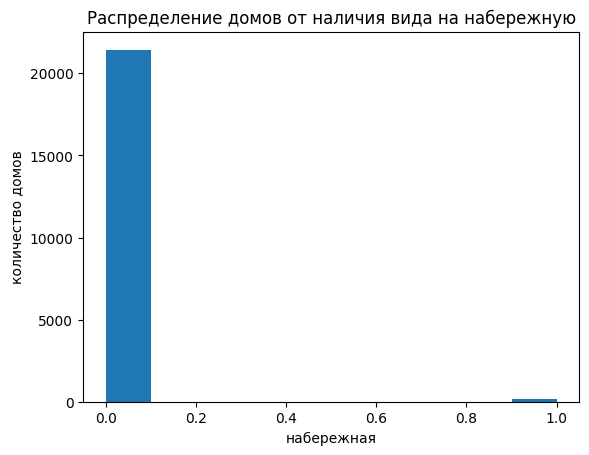

In [18]:

plt.hist(df['waterfront'])
plt.xlabel('набережная')
plt.ylabel('количество домов')
plt.title('Распределение домов от наличия вида на набережную')

2.1 Практически все дома без вида на набережную, лишь очень малая часть - с видом

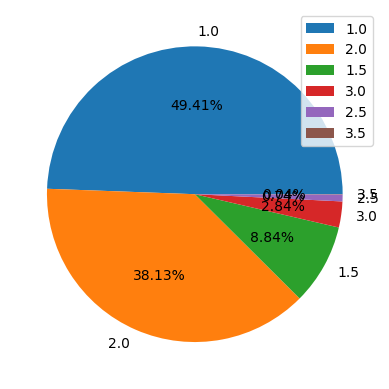

In [19]:
data = df['floors'].value_counts()
data
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

2.2 Почти половина домов - одноэтажные, чуть больше трети - двухэтажные, меньше всего - домов с 2,5 и 3,5 этажами

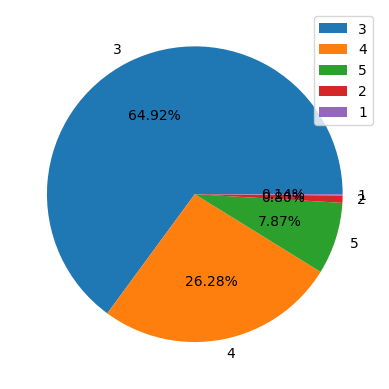

In [20]:
data = df['condition'].value_counts()
data
plt.pie(data.values, labels=data.index, autopct='%1.2f%%')
plt.legend(data.index);

2.3 Больше половины домов со средним состоянием, почти четверть - с состоянием выше среднего, меньше всего домов - в очень плохом и плохом состояниях

## Задача 3
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

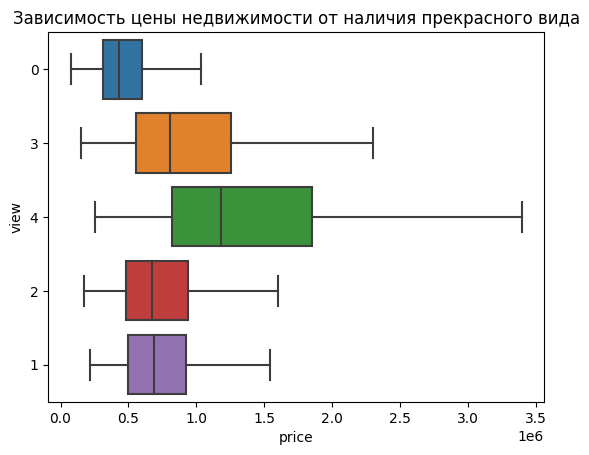

In [21]:
import seaborn as sns
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от наличия прекрасного вида');

3.1 По боксплотам можно сказать, что вид влияет на цену: чем лучше вид, тем выше цена дома

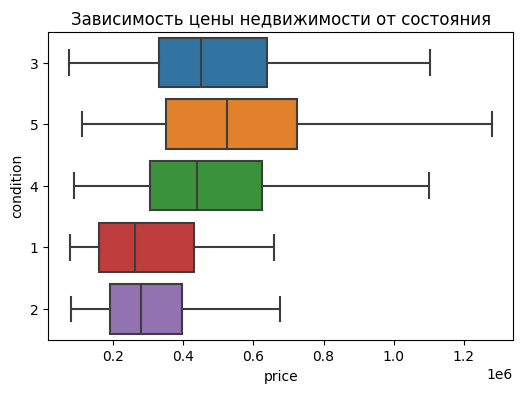

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], y=df['condition'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от состояния');

3.2 По боксплотам можно сказать, что состояние дома влияет на цену: чем лучше состояние, тем выше цена дома

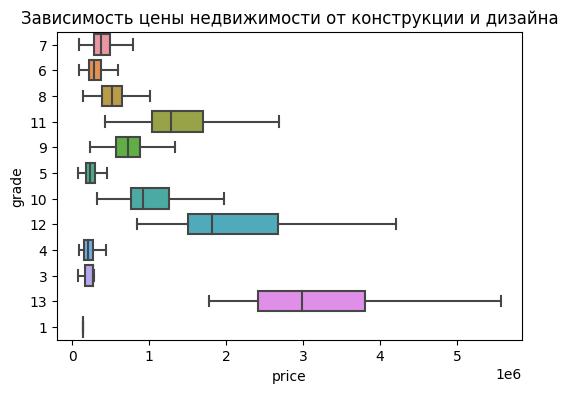

In [23]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от конструкции и дизайна');

3.3 По боксплотам можно сказать, что конструкция и дизайн дома влияет на цену: чем они лучше, тем выше цена дома

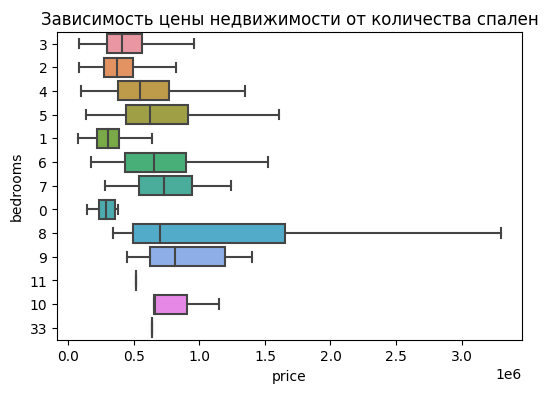

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'], y=df['bedrooms'].astype('str'), whis=1.5, showfliers=False)
plt.title('Зависимость цены недвижимости от количества спален');

3.4 Можно сказать, что количество спален напрямую на цену не влияет, т.к. дома с количеством спален 8 шт. стоят дороже, чем дома с количеством спален 9,10,11,33

In [60]:
import numpy as np
corr_matrix = df.corr(numeric_only=True)
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) == -0.0] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,-0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1
price,0.0,1.0,0.3,0.5,0.7,0.1,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.1,0.1,-0.1,0.3,0.0,0.6,0.1
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.2,0.0,0.1,0.0,0.4,0.5,0.3,0.2,0.0,-0.2,0.0,0.1,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.1,0.5,0.1,0.2,-0.1,0.7,0.7,0.3,0.5,0.1,-0.2,0.0,0.2,0.6,0.1
sqft_living,0.0,0.7,0.6,0.8,1.0,0.2,0.4,0.1,0.3,-0.1,0.8,0.9,0.4,0.3,0.1,-0.2,0.1,0.2,0.8,0.2
sqft_lot,-0.1,0.1,0.0,0.1,0.2,1.0,0.0,0.0,0.1,0.0,0.1,0.2,0.0,0.1,0.0,-0.1,-0.1,0.2,0.1,0.7
floors,0.0,0.3,0.2,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,-0.2,0.5,0.0,-0.1,0.0,0.1,0.3,0.0
waterfront,0.0,0.3,0.0,0.1,0.1,0.0,0.0,1.0,0.4,0.0,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.1,0.0
view,0.0,0.4,0.1,0.2,0.3,0.1,0.0,0.4,1.0,0.0,0.3,0.2,0.3,-0.1,0.1,0.1,0.0,-0.1,0.3,0.1
condition,0.0,0.0,0.0,-0.1,-0.1,0.0,-0.3,0.0,0.0,1.0,-0.1,-0.2,0.2,-0.4,-0.1,0.0,0.0,-0.1,-0.1,0.0


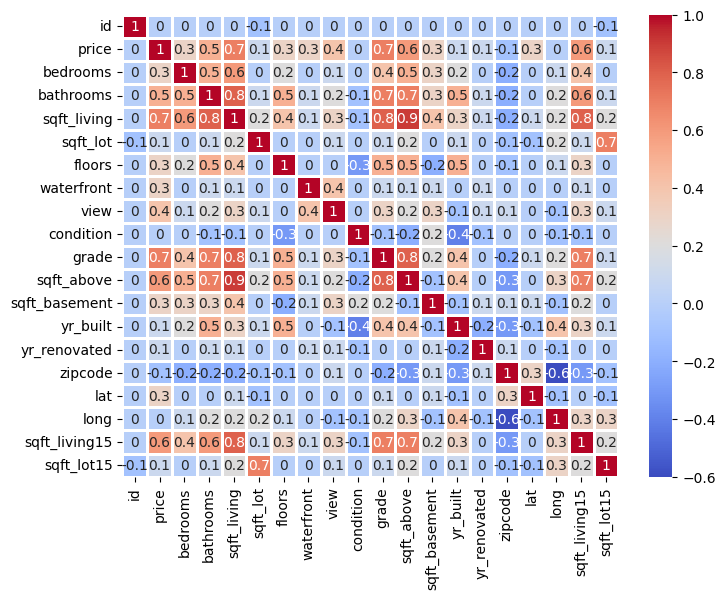

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=1, cmap='coolwarm');

3.5 По тепловой карте видно корреляцию (прямую (если ближе к 1) и обратную (если ближе к -1)). 